In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('gdrive/My Drive/Project/continuous dataset.csv')
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


In [ ]:
df.index = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


<Axes: xlabel='datetime'>

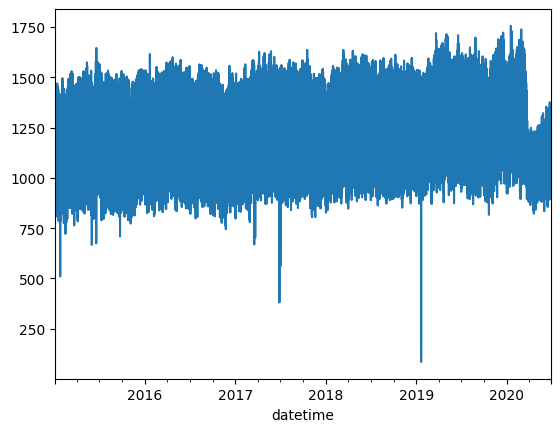

In [ ]:
load = df['nat_demand']
load.plot()

In [ ]:
load

datetime
2015-01-03 01:00:00     970.3450
2015-01-03 02:00:00     912.1755
2015-01-03 03:00:00     900.2688
2015-01-03 04:00:00     889.9538
2015-01-03 05:00:00     893.6865
                         ...    
2020-06-26 20:00:00    1128.5592
2020-06-26 21:00:00    1112.7488
2020-06-26 22:00:00    1081.5680
2020-06-26 23:00:00    1041.6240
2020-06-27 00:00:00    1013.5683
Name: nat_demand, Length: 48048, dtype: float64

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(load, WINDOW_SIZE)
X1.shape, y1.shape

((48043, 5, 1), (48043,))

In [ ]:
X_train1, y_train1 = X1[:33630]/1000, y1[:33630]/1000
X_val1, y_val1 = X1[33630:38434]/1000, y1[33630:38434]/1000
X_test1, y_test1 = X1[38434:]/1000, y1[38434:]/1000
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((33630, 5, 1), (33630,), (4804, 5, 1), (4804,), (9609, 5, 1), (9609,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 64)                16896     
                                                                 
 dense_34 (Dense)            (None, 8)                 520       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])


Epoch 1/10
1051/1051 [==============================] - 13s 10ms/step - loss: 0.1446 - root_mean_squared_error: 0.3802 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1506
Epoch 2/10
1051/1051 [==============================] - 9s 9ms/step - loss: 0.0219 - root_mean_squared_error: 0.1480 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1443
Epoch 3/10
1051/1051 [==============================] - 8s 8ms/step - loss: 0.0197 - root_mean_squared_error: 0.1402 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1344
Epoch 4/10
1051/1051 [==============================] - 9s 9ms/step - loss: 0.0166 - root_mean_squared_error: 0.1288 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1200
Epoch 5/10
1051/1051 [==============================] - 8s 7ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0735
Epoch 6/10
1051/1051 [==============================] - 10s 10ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_los

In [ ]:
model1.evaluate(X_test1, y_test1, batch_size=64, verbose=2)

151/151 - 0s - loss: 0.0026 - root_mean_squared_error: 0.0514 - 332ms/epoch - 2ms/step


[0.0026393835432827473, 0.05137493088841438]

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1051/1051 [==============================] - 4s 3ms/step


,Train Predictions,Actuals
0,0.944623,0.879232
1,0.948777,0.932488
2,0.989818,1.048972
3,1.097899,1.167907
4,1.229921,1.257507
...,...,...
33625,0.945294,0.898657
33626,0.953148,0.946216
33627,0.998413,1.003513
33628,1.063645,1.047170


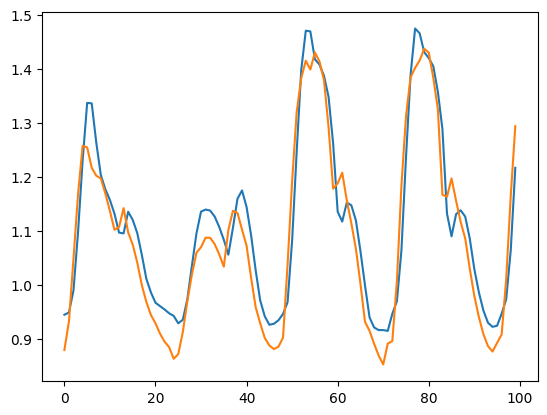

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

151/151 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,1.161901,1.095883
1,1.159175,1.103372
2,1.147623,1.093051
3,1.125395,1.076497
4,1.098748,1.059755
...,...,...
4799,1.570051,1.559128
4800,1.585129,1.551614
4801,1.549782,1.584395
4802,1.554306,1.569962


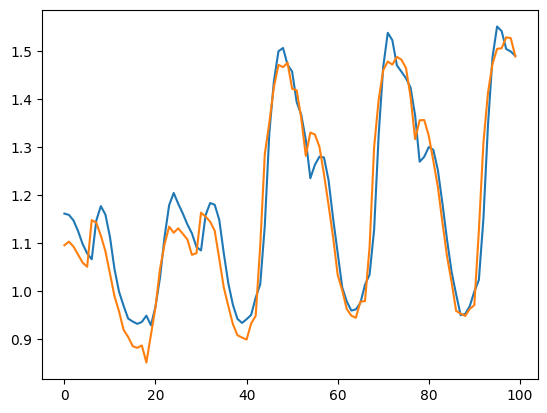

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

301/301 [==============================] - 1s 2ms/step


,Test Predictions,Actuals
0,1.477081,1.438600
1,1.388583,1.347792
2,1.280787,1.372609
3,1.282480,1.426328
4,1.352268,1.404168
...,...,...
9604,1.116953,1.128559
9605,1.156845,1.112749
9606,1.149767,1.081568
9607,1.108044,1.041624


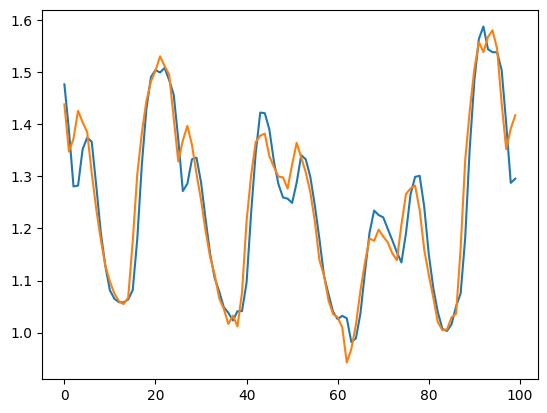

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [ ]:
#split

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end],label="Predictions")
  plt.plot(df['Actuals'][start:end],label="Actuals")
  plt.legend(loc="lower left")
  return df, mse(predictions, y)

301/301 [==============================] - 1s 2ms/step


(      Predictions   Actuals
 0        1.477081  1.438600
 1        1.388583  1.347792
 2        1.280787  1.372609
 3        1.282480  1.426328
 4        1.352268  1.404168
 ...           ...       ...
 9604     1.116953  1.128559
 9605     1.156845  1.112749
 9606     1.149767  1.081568
 9607     1.108044  1.041624
 9608     1.055725  1.013568
 
 [9609 rows x 2 columns],
 0.0026997346334146958)

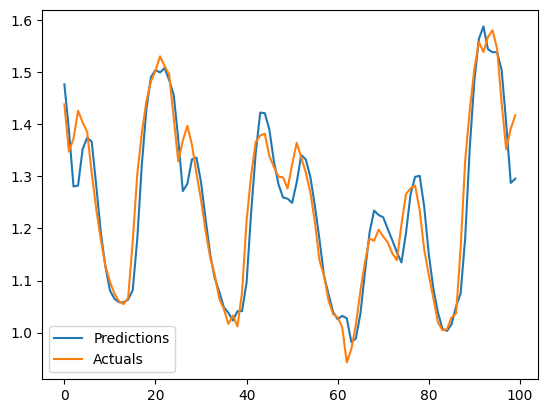

In [ ]:
plot_predictions1(model1, X_test1, y_test1)

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 8)                 2056      
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1051/1051 [==============================] - 4s 3ms/step - loss: 0.1219 - root_mean_squared_error: 0.3492 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156
Epoch 2/10
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0991
Epoch 3/10
1051/1051 [==============================] - 4s 3ms/step - loss: 0.0072 - root_mean_squared_error: 0.0851 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 4/10
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 5/10
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0495
Epoch 6/10
1051/1051 [==============================] - 3s 2ms/step - loss: 0.0020 - root_mean_squared_error: 0.0443 - val_loss: 0

301/301 [==============================] - 0s 1ms/step


(      Predictions   Actuals
 0        1.444026  1.438600
 1        1.368216  1.347792
 2        1.296003  1.372609
 3        1.350302  1.426328
 4        1.426365  1.404168
 ...           ...       ...
 9604     1.161617  1.128559
 9605     1.139589  1.112749
 9606     1.112643  1.081568
 9607     1.069982  1.041624
 9608     1.023364  1.013568
 
 [9609 rows x 2 columns],
 0.001474571991540866)

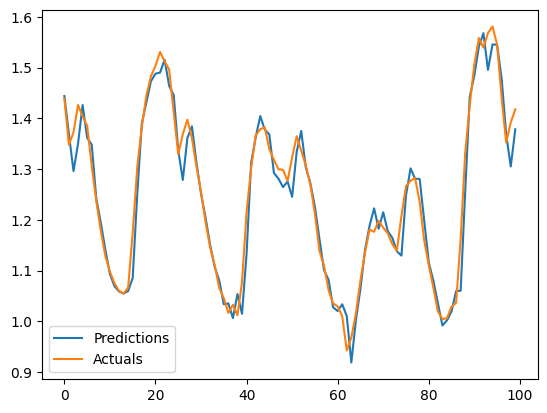

In [ ]:
plot_predictions1(model2, X_test1, y_test1)

In [ ]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                12864     
                                                                 
 dense_38 (Dense)            (None, 8)                 520       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1051/1051 [==============================] - 12s 9ms/step - loss: 1.2826 - root_mean_squared_error: 1.1325 - val_loss: 1.3131 - val_root_mean_squared_error: 1.1459
Epoch 2/10
1051/1051 [==============================] - 8s 8ms/step - loss: 1.0670 - root_mean_squared_error: 1.0329 - val_loss: 1.0980 - val_root_mean_squared_error: 1.0479
Epoch 3/10
1051/1051 [==============================] - 9s 8ms/step - loss: 0.8772 - root_mean_squared_error: 0.9366 - val_loss: 0.9074 - val_root_mean_squared_error: 0.9526
Epoch 4/10
1051/1051 [==============================] - 9s 8ms/step - loss: 0.7103 - root_mean_squared_error: 0.8428 - val_loss: 0.7388 - val_root_mean_squared_error: 0.8595
Epoch 5/10
1051/1051 [==============================] - 8s 7ms/step - loss: 0.5645 - root_mean_squared_error: 0.7513 - val_loss: 0.5908 - val_root_mean_squared_error: 0.7686
Epoch 6/10
1051/1051 [==============================] - 13s 12ms/step - loss: 0.4385 - root_mean_squared_error: 0.6622 - val_loss

301/301 [==============================] - 0s 1ms/step


(      Predictions   Actuals
 0        1.444026  1.438600
 1        1.368216  1.347792
 2        1.296003  1.372609
 3        1.350302  1.426328
 4        1.426365  1.404168
 ...           ...       ...
 9604     1.161617  1.128559
 9605     1.139589  1.112749
 9606     1.112643  1.081568
 9607     1.069982  1.041624
 9608     1.023364  1.013568
 
 [9609 rows x 2 columns],
 0.001474571991540866)

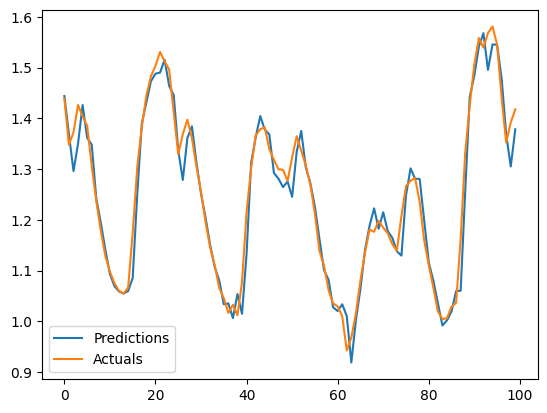

In [ ]:
plot_predictions1(model2, X_test1, y_test1)

In [ ]:
#part2

In [ ]:
load_df = pd.DataFrame({'Nat demand':load/1000})
load_df['Seconds'] = load_df.index.map(pd.Timestamp.timestamp)
load_df

,Nat demand,Seconds
datetime,,
2015-01-03 01:00:00,0.970345,1.420247e+09
2015-01-03 02:00:00,0.912176,1.420250e+09
2015-01-03 03:00:00,0.900269,1.420254e+09
2015-01-03 04:00:00,0.889954,1.420258e+09
2015-01-03 05:00:00,0.893687,1.420261e+09
...,...,...
2020-06-26 20:00:00,1.128559,1.593202e+09
2020-06-26 21:00:00,1.112749,1.593205e+09
2020-06-26 22:00:00,1.081568,1.593209e+09


In [ ]:
day = 60*60*24
year = 365.2425*day

load_df['Day sin'] = np.sin(load_df['Seconds'] * (2* np.pi / day))
load_df['Day cos'] = np.cos(load_df['Seconds'] * (2 * np.pi / day))
load_df['Year sin'] = np.sin(load_df['Seconds'] * (2 * np.pi / year))
load_df['Year cos'] = np.cos(load_df['Seconds'] * (2 * np.pi / year))
load_df.head()

,Nat demand,Seconds,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,
2015-01-03 01:00:00,0.970345,1.420247e+09,0.258819,0.965926,0.036619,0.999329
2015-01-03 02:00:00,0.912176,1.420250e+09,0.500000,0.866025,0.037336,0.999303
2015-01-03 03:00:00,0.900269,1.420254e+09,0.707107,0.707107,0.038052,0.999276
2015-01-03 04:00:00,0.889954,1.420258e+09,0.866025,0.500000,0.038768,0.999248
2015-01-03 05:00:00,0.893687,1.420261e+09,0.965926,0.258819,0.039484,0.999220


In [ ]:
load_df = load_df.drop('Seconds', axis=1)
load_df.head()

,Nat demand,Day sin,Day cos,Year sin,Year cos
datetime,,,,,
2015-01-03 01:00:00,0.970345,0.258819,0.965926,0.036619,0.999329
2015-01-03 02:00:00,0.912176,0.500000,0.866025,0.037336,0.999303
2015-01-03 03:00:00,0.900269,0.707107,0.707107,0.038052,0.999276
2015-01-03 04:00:00,0.889954,0.866025,0.500000,0.038768,0.999248
2015-01-03 05:00:00,0.893687,0.965926,0.258819,0.039484,0.999220


In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(load_df)
X2.shape, y2.shape

((48042, 6, 5), (48042,))

In [ ]:
X2_train, y2_train = X2[:33630], y2[:33630]
X2_val, y2_val = X2[33630:38434], y2[33630:38434]
X2_test, y2_test = X2[38434:], y2[38434:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((33630, 6, 5), (33630,), (4804, 6, 5), (4804,), (9608, 6, 5), (9608,))

In [ ]:
load_training_mean = np.mean(X2_train[:, :, 0])
load_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - load_training_mean) / load_training_std
  return X

In [ ]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 2.04102842e+00,  2.58819045e-01, -9.65925826e-01,
          6.35682541e-01, -7.71950586e-01],
        [ 2.00186931e+00,  1.09447382e-11, -1.00000000e+00,
          6.35129057e-01, -7.72406033e-01],
        [ 2.17269309e+00, -2.58819045e-01, -9.65925826e-01,
          6.34575247e-01, -7.72861084e-01],
        [ 2.09748337e+00, -5.00000000e-01, -8.66025404e-01,
          6.34021111e-01, -7.73315738e-01],
        [ 1.83322803e+00, -7.07106781e-01, -7.07106781e-01,
          6.33466649e-01, -7.73769994e-01],
        [ 1.41295688e+00, -8.66025404e-01, -5.00000000e-01,
          6.32911862e-01, -7.74223853e-01]],

       [[ 2.00186931e+00,  1.09447382e-11, -1.00000000e+00,
          6.35129057e-01, -7.72406033e-01],
        [ 2.17269309e+00, -2.58819045e-01, -9.65925826e-01,
          6.34575247e-01, -7.72861084e-01],
        [ 2.09748337e+00, -5.00000000e-01, -8.66025404e-01,
          6.34021111e-01, -7.73315738e-01],
        [ 1.83322803e+00, -7.07106781e-01, -7.07106781e-01,
  

In [ ]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 64)                17920     
                                                                 
 dense_40 (Dense)            (None, 8)                 520       
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1051/1051 [==============================] - 12s 8ms/step - loss: 0.2067 - root_mean_squared_error: 0.4546 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1054
Epoch 2/10
1051/1051 [==============================] - 10s 9ms/step - loss: 0.0043 - root_mean_squared_error: 0.0657 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0694
Epoch 3/10
1051/1051 [==============================] - 9s 9ms/step - loss: 0.0022 - root_mean_squared_error: 0.0464 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0474
Epoch 4/10
1051/1051 [==============================] - 9s 8ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0424
Epoch 5/10
1051/1051 [==============================] - 10s 9ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0381
Epoch 6/10
1051/1051 [==============================] - 8s 8ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss

301/301 [==============================] - 1s 2ms/step


(      Predictions   Actuals
 0        1.324000  1.347792
 1        1.329338  1.372609
 2        1.355177  1.426328
 3        1.375892  1.404168
 4        1.354903  1.385320
 ...           ...       ...
 9603     1.128420  1.128559
 9604     1.103024  1.112749
 9605     1.064669  1.081568
 9606     1.012908  1.041624
 9607     0.989778  1.013568
 
 [9608 rows x 2 columns],
 0.001121807866043814)

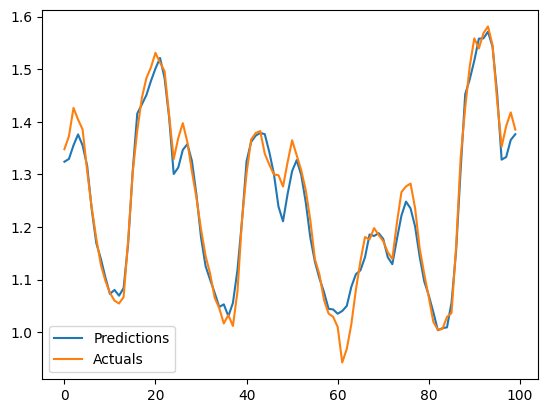

In [ ]:
plot_predictions1(model4, X2_test, y2_test)

In [ ]:
#third

In [ ]:
load_temp_df = pd.concat([df['T2M_toc'], load_df], axis=1)
load_temp_df.head()

,T2M_toc,Nat demand,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,
2015-01-03 01:00:00,25.865259,0.970345,0.258819,0.965926,0.036619,0.999329
2015-01-03 02:00:00,25.899255,0.912176,0.500000,0.866025,0.037336,0.999303
2015-01-03 03:00:00,25.937280,0.900269,0.707107,0.707107,0.038052,0.999276
2015-01-03 04:00:00,25.957544,0.889954,0.866025,0.500000,0.038768,0.999248
2015-01-03 05:00:00,25.973840,0.893687,0.965926,0.258819,0.039484,0.999220


In [ ]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(load_temp_df)
X3.shape, y3.shape

((48041, 7, 6), (48041, 2))

In [ ]:
X3_train, y3_train = X3[:33630], y3[:33630]
X3_val, y3_val = X3[33630:38434], y3[33630:38434]
X3_test, y3_test = X3[38434:], y3[38434:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((33630, 7, 6), (33630, 2), (4804, 7, 6), (4804, 2), (9607, 7, 6), (9607, 2))

In [ ]:
load_training_mean3 = np.mean(X3_train[:, :, 1])
load_training_std3 = np.std(X3_train[:, :, 1])

temp_training_mean3 = np.mean(X3_train[:, :, 0])
temp_training_std3 = np.std(X3_train[:, :, 0])

def preprocess3(X):
  X[:, :, 1] = (X[:, :, 1] - load_training_mean3) / load_training_std3
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 1] = (y[:, 1] - load_training_mean3) / load_training_std3
  y[:, 0] = (y[:, 0] - temp_training_mean3) / temp_training_std3
  return y

In [ ]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [ ]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[ 5.09190693e-01,  1.06907495e+00],
       [ 1.98096659e-01,  1.34901094e+00],
       [-1.31642908e-03,  1.23352978e+00],
       ...,
       [-2.47905886e-01, -4.47556065e-01],
       [-3.10727574e-01, -6.55706692e-01],
       [-3.81723293e-01, -8.01906660e-01]])

In [ ]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 64)                18176     
                                                                 
 dense_42 (Dense)            (None, 8)                 520       
                                                                 
 dense_43 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1051/1051 [==============================] - 14s 10ms/step - loss: 0.3132 - root_mean_squared_error: 0.5596 - val_loss: 0.0941 - val_root_mean_squared_error: 0.3068
Epoch 2/10
1051/1051 [==============================] - 10s 9ms/step - loss: 0.0542 - root_mean_squared_error: 0.2328 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2349
Epoch 3/10
1051/1051 [==============================] - 10s 9ms/step - loss: 0.0355 - root_mean_squared_error: 0.1885 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2011
Epoch 4/10
1051/1051 [==============================] - 10s 10ms/step - loss: 0.0266 - root_mean_squared_error: 0.1631 - val_loss: 0.0322 - val_root_mean_squared_error: 0.1795
Epoch 5/10
1051/1051 [==============================] - 9s 9ms/step - loss: 0.0209 - root_mean_squared_error: 0.1444 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1641
Epoch 6/10
1051/1051 [==============================] - 10s 9ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  load_preds, temp_preds = predictions[:, 1], predictions[:, 0]
  load_actuals, temp_actuals = y[:, 1], y[:, 0]
  df = pd.DataFrame(data={'Load Predictions': load_actuals,
                          'Load Actuals':load_preds,
                          'Temperature Predictions': temp_preds,
                          'Temperature Actuals': temp_actuals
                          })
  plt.subplot(1, 2, 1)
  plt.plot(df['Load Predictions'][start:end])
  plt.plot(df['Load Actuals'][start:end])
  plt.subplot(1, 2, 2)
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  return df[start:end]

301/301 [==============================] - 1s 2ms/step


,Load Predictions,Load Actuals,Temperature Predictions,Temperature Actuals
0,1.069075,0.747719,0.612883,0.509191
1,1.349011,1.185560,0.236720,0.198097
2,1.233530,1.157188,0.062386,-0.001316
3,1.135312,0.962138,-0.095980,-0.162966
4,0.724930,0.770476,-0.251092,-0.295378
...,...,...,...,...
95,0.964583,0.873496,0.428670,0.383566
96,1.169363,0.755380,0.131932,0.051833
97,1.304031,1.137203,-0.163918,-0.145804
98,1.134135,1.166243,-0.238576,-0.224216


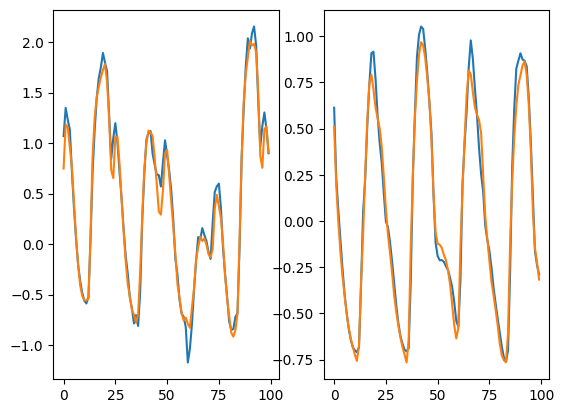

In [ ]:
plot_predictions2(model5, X3_test, y3_test)

In [ ]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_load(arr):
  arr = (arr*load_training_std3) + load_training_mean3
  return arr

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  load_preds, temp_preds = postprocess_load(predictions[:, 1]), postprocess_temp(predictions[:, 0])
  load_actuals, temp_actuals = postprocess_load(y[:, 1]), postprocess_temp(y[:, 0])
  df = pd.DataFrame(data={'Load Predictions': load_preds,
                          'Load Actuals':load_actuals,
                          'Temperature Predictions': temp_preds,
                          'Temperature Actuals': temp_actuals
                          })
  plt.plot(df['Load Predictions'][start:end])
  plt.plot(df['Load Actuals'][start:end])
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])

  return df[start:end]

301/301 [==============================] - 1s 2ms/step


,Load Predictions,Load Actuals,Temperature Predictions,Temperature Actuals
0,1.310941,1.372609,28.391628,28.220514
1,1.394962,1.426328,27.770884,27.707147
2,1.389518,1.404168,27.483198,27.378076
3,1.352087,1.385320,27.221863,27.111322
4,1.315308,1.306567,26.965897,26.892816
...,...,...,...,...
95,1.335077,1.352557,28.087639,28.013208
96,1.312411,1.391854,27.597963,27.465784
97,1.385682,1.417697,27.109753,27.139642
98,1.391255,1.385094,26.986551,27.010248


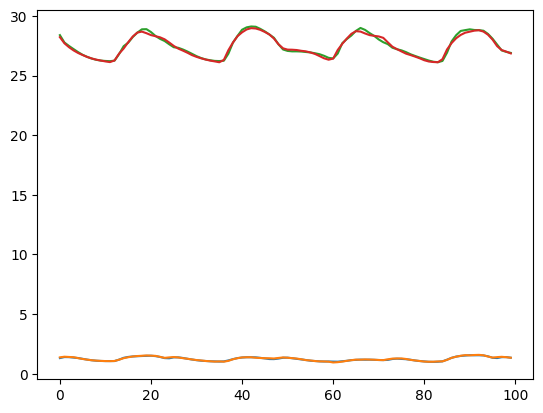

In [ ]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

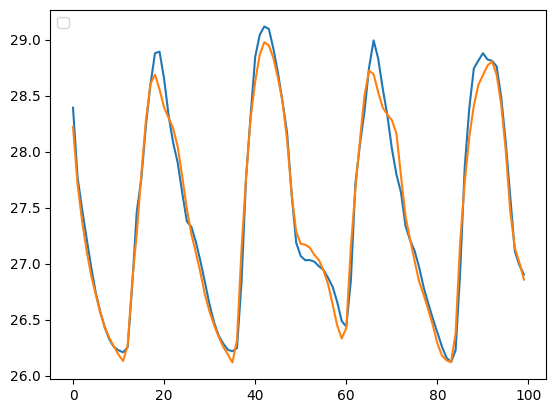

In [ ]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])
plt.legend(loc="upper left")

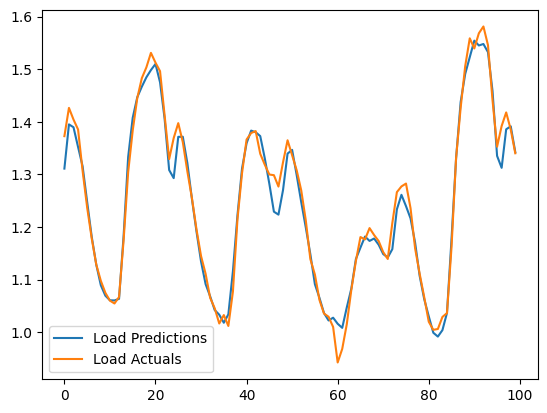

In [ ]:
plt.plot(post_processed_df['Load Predictions'][start:end],label='Load Predictions')
plt.plot(post_processed_df['Load Actuals'][start:end], label='Load Actuals')
plt.legend(loc="lower left")

In [ ]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 7, 32)             4992      
                                                                 
 lstm_19 (LSTM)              (None, 64)                24832     
                                                                 
 dense_44 (Dense)            (None, 8)                 520       
                                                                 
 dense_45 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30362 (118.60 KB)
Trainable params: 30362 (118.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1051/1051 [==============================] - 22s 17ms/step - loss: 0.2543 - root_mean_squared_error: 0.5043 - val_loss: 0.1246 - val_root_mean_squared_error: 0.3530
Epoch 2/10
1051/1051 [==============================] - 17s 16ms/step - loss: 0.0782 - root_mean_squared_error: 0.2796 - val_loss: 0.0864 - val_root_mean_squared_error: 0.2939
Epoch 3/10
1051/1051 [==============================] - 17s 16ms/step - loss: 0.0574 - root_mean_squared_error: 0.2397 - val_loss: 0.0672 - val_root_mean_squared_error: 0.2592
Epoch 4/10
1051/1051 [==============================] - 18s 17ms/step - loss: 0.0448 - root_mean_squared_error: 0.2117 - val_loss: 0.0540 - val_root_mean_squared_error: 0.2323
Epoch 5/10
1051/1051 [==============================] - 18s 17ms/step - loss: 0.0358 - root_mean_squared_error: 0.1893 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2166
Epoch 6/10
1051/1051 [==============================] - 18s 17ms/step - loss: 0.0293 - root_mean_squared_error: 0.1711 -

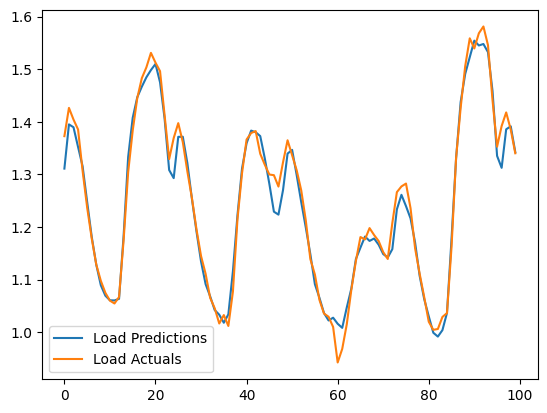

In [ ]:
plt.plot(post_processed_df['Load Predictions'][start:end],label='Load Predictions')
plt.plot(post_processed_df['Load Actuals'][start:end], label='Load Actuals')
plt.legend(loc="lower left")

In [ ]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_3 (Flatten)         (None, 384)               0         
                                                                 
 dense_46 (Dense)            (None, 8)                 3080      
                                                                 
 dense_47 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1051/1051 [==============================] - 6s 4ms/step - loss: 0.2680 - root_mean_squared_error: 0.5176 - val_loss: 0.0895 - val_root_mean_squared_error: 0.2992
Epoch 2/10
1051/1051 [==============================] - 4s 4ms/step - loss: 0.0472 - root_mean_squared_error: 0.2173 - val_loss: 0.0486 - val_root_mean_squared_error: 0.2205
Epoch 3/10
1051/1051 [==============================] - 4s 4ms/step - loss: 0.0288 - root_mean_squared_error: 0.1697 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1855
Epoch 4/10
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0224 - root_mean_squared_error: 0.1497 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1680
Epoch 5/10
1051/1051 [==============================] - 4s 3ms/step - loss: 0.0187 - root_mean_squared_error: 0.1369 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1524
Epoch 6/10
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0164 - root_mean_squared_error: 0.1280 - val_loss: 0

301/301 [==============================] - 0s 1ms/step


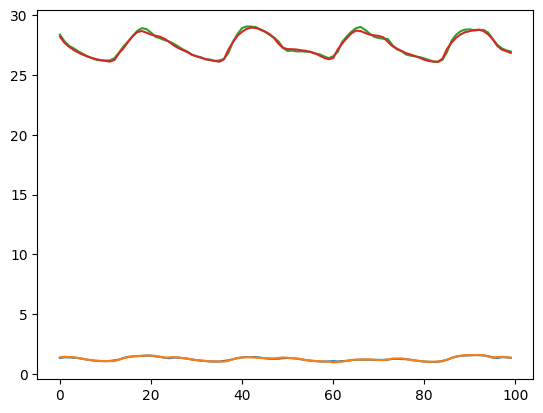

In [ ]:
post_processed_df = plot_predictions2(model7, X3_test, y3_test)

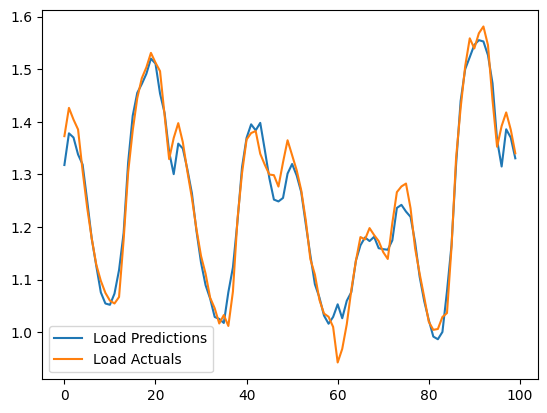

In [ ]:

plt.plot(post_processed_df['Load Predictions'][start:end],label='Load Predictions')
plt.plot(post_processed_df['Load Actuals'][start:end], label='Load Actuals')
plt.legend(loc="lower left")